In [28]:
import pandas as pan
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.colors as colors
from gptomics import plot

In [29]:
ad = pan.read_csv(filepath_or_buffer="./application_domains")

at = pan.read_csv(filepath_or_buffer="./application_transactions")

pd = pan.read_csv(filepath_or_buffer="./production_domains")

pt = pan.read_csv(filepath_or_buffer="./production_transactions")

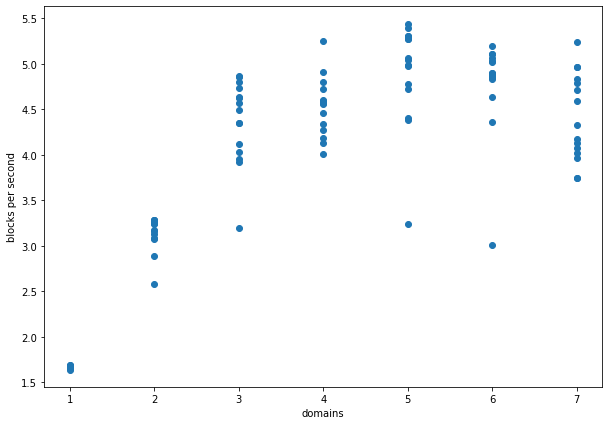

In [30]:
plt.figure(figsize=(10,7))
plt.xlabel("domains")
plt.ylabel("blocks per second")
plt.scatter(ad["domains"],ad["time"])

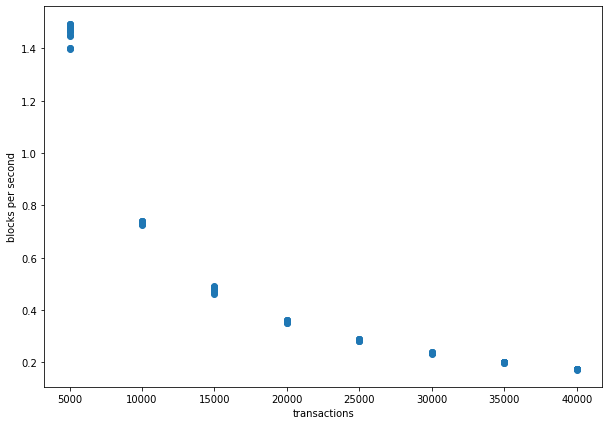

In [31]:
plt.figure(figsize=(10,7))
plt.xlabel("transactions")
plt.ylabel("blocks per second")
plt.scatter(at["transactions"],at["time"])

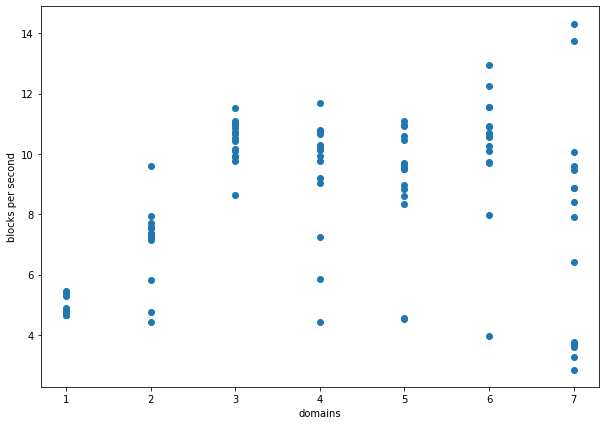

In [32]:
plt.figure(figsize=(10,7))
plt.xlabel("domains")
plt.ylabel("blocks per second")
plt.scatter(pd["domains"],pd["time"])

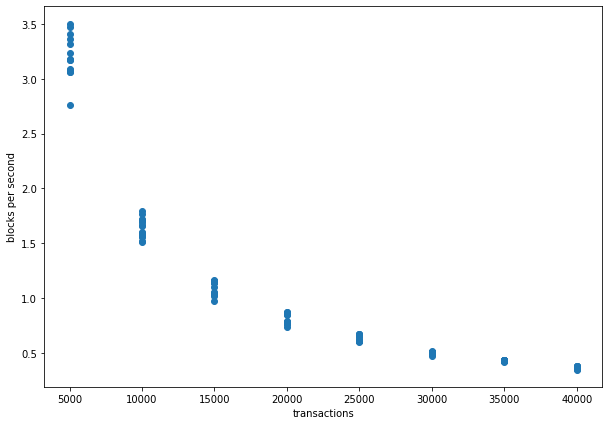

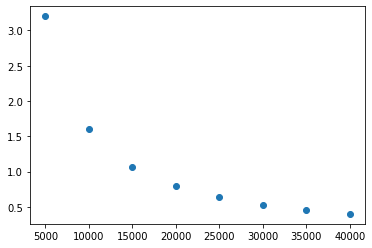

In [33]:
plt.figure(figsize=(10,7))
plt.xlabel("transactions")
plt.ylabel("blocks per second")
plt.scatter(pt["transactions"],pt["time"])
ptp = 1/pt
fig = plt.figure()
transactions = np.arange(5000,45000,5000)
times = transactions * (2.5/40000)
plt.scatter(transactions, 1/times)

In [34]:
from models import full_model
# const = 3.4/25510
const = (2*3.4)/(25510*(1.05))
change = 1.05
n = 1.5
a = 0
b = 1
h = 0
def f(t, d):
  return (const * (t) + a) / ((d**n) + b) + h

model = full_model(a,b,change,h,n,.05)
  
t = np.linspace(5000,40000,30)
d = np.linspace(1,7,30)

t, d = np.meshgrid(t,d)
z = f(t,d)

In [35]:
print(z.shape)

(30, 30)


n diff is 10698841.583404997
n diff is 0.0
n diff is 0.0


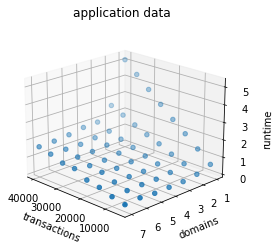

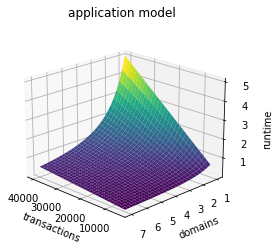

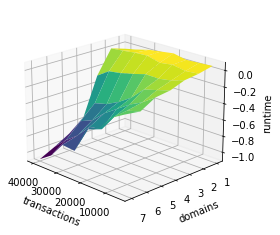

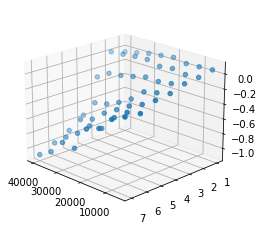

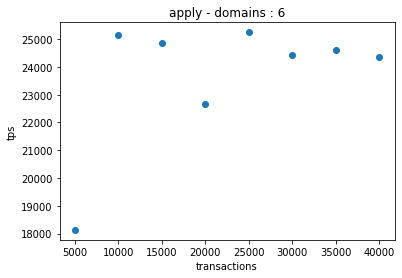

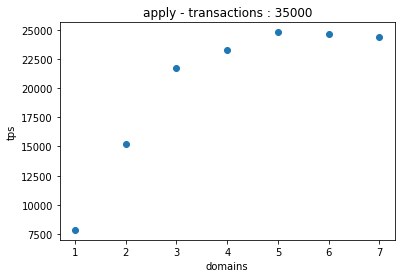

In [36]:
viewx, viewy = (20, 135)
# Data from application over the transaction domain parameter space 
atd = pan.read_csv(filepath_or_buffer="./application_transactions_domains")
fig = plt.figure()
ax = plt.axes(projection='3d')
plt.title(label="application data")
ax.scatter(atd["transactions"],atd["domains"],atd["time"])
ax.view_init(viewx, viewy)
ax.set_xlabel('transactions')
ax.set_ylabel('domains')
ax.set_zlabel('runtime');

fig = plt.figure()
ax = plt.axes(projection='3d')
plt.title(label="application model")
ax.plot_surface(t, d, z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.view_init(viewx, viewy)
ax.set_xlabel('transactions')
ax.set_ylabel('domains')
ax.set_zlabel('runtime');

fig = plt.figure()
ax = plt.axes(projection='3d')
transactions, domains, times =np.array(atd["transactions"]), np.array(atd["domains"]), np.array(atd["time"])

model.learn(transactions, domains, times, 3)
z = model.guess

error = f(transactions,domains) - times
transactionsr = np.reshape(transactions, (7,8))
domainsr = np.reshape(domains, (7,8))
timesr = np.reshape(times, (7,8))
errorr = np.reshape(error, (7,8))
ax.plot_surface(transactionsr, domainsr, errorr, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
ax.view_init(viewx, viewy)
ax.set_xlabel('transactions')
ax.set_ylabel('domains')
ax.set_zlabel('runtime');

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(transactions,domains,error)
ax.view_init(viewx, viewy)

# transactions on a set domain
plt.figure()
ax = plt.axes()
ax.set_xlabel('transactions')
ax.set_ylabel('tps')
transactions, domains, times = np.array(atd["transactions"]), np.array(atd["domains"]), np.array(atd["time"])
transactionsr = np.reshape(transactions, (7,8))
timesr = np.reshape(times, (7,8))
domainsr = np.reshape(domains, (7,8))
d = 1
plt.title(f"apply - domains : {7 - d}")
plt.scatter(transactionsr[d,:],transactionsr[d,:]/timesr[d,:])

# domains with set transactions
plt.figure()
ax = plt.axes()
ax.set_xlabel('domains')
ax.set_ylabel('tps')
t = 1
plt.title(f"apply - transactions : {transactionsr[0,t]}")
plt.scatter(domainsr[:,t],transactionsr[:,t]/timesr[:,t])